# Optymalizacja hiperparametrów 

#### Grid Search 

Na przykładzie modelu *XGBoost* widzimy, że niektóre algorytmy są wysoce parametryzowalne, i prawidłowy dobór hiperparametrów potrafi czasami istotnie podnieść jakość naszych predykcji.  
Poznaliśmy już przeszukiwanie po ustalonej siatce parametrów - `GridSearchCV`. Metoda ta ma jednak dwie dość istotne wady:
* rozmiar siatki bardzo szybko rośnie wraz z ilością parametrów. Już dla czterech parametrów, po 5 wartości każdy, dostajemy $5^4 = 625$ kombinacji. W sytuacji, kiedy model uczy nam się minutę (a to w praktyce bardzo optymisyczny przypadek) musimy czekać 10 godzin na przejście pętli.
* niska gęstość siatki powoduje, że możemy nie wstrzelić się w tą optymalną wartość. Przykład:

 https://cdn-images-1.medium.com/max/1600/1*ZTlQm_WRcrNqL-nLnx6GJA.png


#### Random Search 

Częściowym rozwiązaniem tego problemu jest `RandomizedSearch`, czyli losowe przeszukiwanie przestrzeni (zobrazowane na powyższym przykładzie). 
Zalety takiego rozwiązania:
* wspomniane wyżej dokładniejsze przeszukanie każdego z parametrów
* możliwość zadania dowolnego rozkładu (w praktyce dowolnego zaimplementowanego w scipy) dla zmiennych ciągłych
* szybszy czas działania - dzięki temu że przeszukujemy przestrzeń dokładniej, możemy przez to mocno ograniczyć ilość iteracji.  


Jak podawać wartości parametrów do przetestowania? Możemy to zrobić na dwa sposoby:
* lista wartości - wtedy algorytm po prostu będzie losował jedną z wartości z listy
* ciągły rozkład - losujemy wtedy dowolną wartość z tego rozkładu. w `RandomizedSearchCV` przez rozkład rozumiemy obiekt, który posiada metodę `rvs` zwracającą próbkę z tego rozkładu. Dużo rozkładów znajdziemy w module `scipy.stats.distributions` (https://docs.scipy.org/doc/scipy/reference/stats.html)

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

from sklearn import datasets
cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# RandomizedSearchCV??

In [26]:
# GridSearchCV??

In [27]:
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150, 200, 400],
    'gamma': [0, 0.5, 1, 2],
    'colsample_bytree': [1, 0.8, 0.5],
    'subsample': [1, 0.8, 0.5],
    'min_child_weight': [1, 5, 10]
}

In [28]:
from scipy.stats.distributions import uniform, randint

In [29]:
# ??uniform

Rozkłady przyjmują 2 parametry: `loc`, `scale`.

`[2, 3, 4, 5] --> uniform(2, 3)`

In [30]:
uniform_23 = uniform(2, 3)

In [31]:
# ??randint

In [32]:
# randint(low, high) losuje od low do high-1 włącznie!
randint_25 = randint(2, 6)

In [33]:
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150, 200, 400],
    'gamma': [0, 0.5, 1, 2],
    'colsample_bytree': [1, 0.8, 0.5],
    'subsample': [1, 0.8, 0.5],
    'min_child_weight': [1, 5, 10]
}

param_distribution = {
    'max_depth': randint(3, 11),
    'learning_rate': uniform(0.001, 0.1-0.001),
    'n_estimators': randint(50, 400),
    'gamma': uniform(0,2),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 11)
}

Zbudować `RandomSearchCV` (z wybraną przez siebie ilością iteracji). Narysuj wykres wyników w czasie.

In [34]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=10, random_state=seed)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
estimator = XGBClassifier(n_jobs=-1)
randomized_grid_search = RandomizedSearchCV(
    n_iter=30, estimator=estimator, 
    cv=kfold, 
    param_distributions=param_grid,
    return_train_score=True
)

In [36]:
randomized_dist_search = RandomizedSearchCV(
    n_iter=30, estimator=estimator, 
    cv=kfold, 
    param_distributions=param_distribution,
    return_train_score=True
)

In [37]:
randomized_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'colsample_bytree': [1, 0.8, 0.5],
                                        'gamma': [0, 0.5, 1, 2],
                                        'learni

In [38]:
randomized_dist_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000335F8853C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0

In [39]:
randomized_grid_search.best_score_

0.9694352159468439

In [40]:
randomized_dist_search.best_score_

0.9718161683277963

In [35]:
import pandas as pd
grid_results = pd.DataFrame(randomized_grid_search.cv_results_)
grid_scores = grid_results.mean_test_score

dist_results = pd.DataFrame(randomized_dist_search.cv_results_)
dist_scores = dist_results.mean_test_score

In [36]:
# dist_scores = [res[1] for res in randomized_dist_search.cv_results_]
# grid_scores = [res[1] for res in randomized_grid_search.cv_results_]

In [37]:
from matplotlib import pyplot as plt

In [38]:
max_scores = []
max_value = 0
for score in dist_scores:
    if score > max_value:
        max_scores.append(score)
        max_value = score
        continue
    else:
        max_scores.append(max_value)

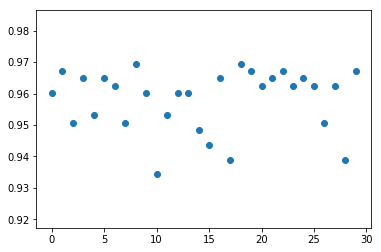

In [39]:
plt.scatter(range(len(dist_scores)), dist_scores)
plt.show()

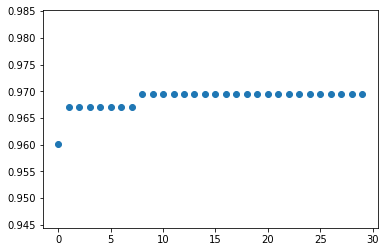

In [40]:
plt.scatter(range(len(max_scores)), max_scores)
plt.show()

In [41]:
max_scores_grid = []
max_value = 0
for score in grid_scores:
    if score > max_value:
        max_scores_grid.append(score)
        max_value = score
        continue
    else:
        max_scores_grid.append(max_value)

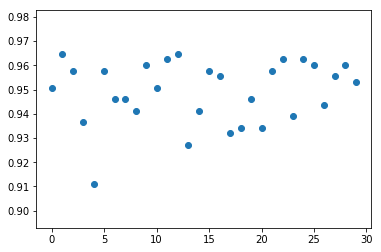

In [42]:
plt.scatter(range(len(grid_scores)), grid_scores)
plt.show()

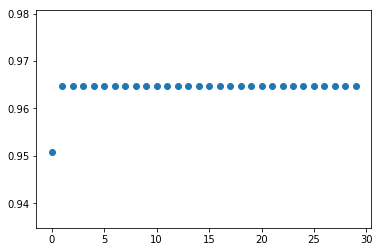

In [43]:
plt.scatter(range(len(max_scores_grid)), max_scores_grid)
plt.show()

Dla zainteresowanych: optymalizacja Bayesowska, pakiet `scikit-optimize`